# NOx Data Exploration
Overview of machines, NOx emissions compared to eBay values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('data/NOx_intervals - 2026-01-20T164805.872.csv')
print(f"Total rows: {len(df):,}")
print(f"\nColumns: {list(df.columns)}")
df.head()

Total rows: 9,480

Columns: ['device_id', 'machine_staat', 'MainGroupLabel', 'Power', 'fuel_mass_flow_liter', 'fuel_per_hour', 'NOx_mass_flow_kg', 'NOx_AUB6_kg', 'motorbelasting', 'verschil_percentage']


,device_id,machine_staat,MainGroupLabel,Power,fuel_mass_flow_liter,fuel_per_hour,NOx_mass_flow_kg,NOx_AUB6_kg,motorbelasting,verschil_percentage
0,51349,Uit,Heistelling,220.0,0.0,0.0,0.0,NaN,0.0,NaN
1,51349,Uit,Heistelling,220.0,0.0,0.0,0.0,NaN,0.0,NaN
2,51349,Uit,Heistelling,220.0,0.0,0.0,0.0,NaN,0.0,NaN
3,51349,Uit,Heistelling,220.0,0.0,0.0,0.0,NaN,0.0,NaN
4,51349,Uit,Heistelling,220.0,0.0,0.0,0.0,NaN,0.0,NaN


## Overview of Machines

In [2]:
# Number of unique machines
n_machines = df['device_id'].nunique()
print(f"Number of unique machines: {n_machines}")
print(f"\nMachine IDs: {sorted(df['device_id'].unique())}")

Number of unique machines: 79

Machine IDs: [np.int64(51349), np.int64(60245), np.int64(65689), np.int64(65921), np.int64(66968), np.int64(67501), np.int64(67655), np.int64(67664), np.int64(67728), np.int64(67833), np.int64(67876), np.int64(67937), np.int64(68047), np.int64(68049), np.int64(68077), np.int64(68100), np.int64(68101), np.int64(68155), np.int64(68168), np.int64(68174), np.int64(68221), np.int64(68249), np.int64(68259), np.int64(68261), np.int64(68325), np.int64(68330), np.int64(68888), np.int64(69008), np.int64(69257), np.int64(69259), np.int64(69440), np.int64(69448), np.int64(69564), np.int64(69595), np.int64(69818), np.int64(70872), np.int64(70944), np.int64(70945), np.int64(267806), np.int64(291098), np.int64(293123), np.int64(298857), np.int64(299240), np.int64(299825), np.int64(299860), np.int64(300259), np.int64(300451), np.int64(300549), np.int64(301448), np.int64(301450), np.int64(301862), np.int64(302131), np.int64(302132), np.int64(302135), np.int64(302136), np.

Machines per type:
MainGroupLabel
Hydraulische rupsgraafmachine    21
Lader                            12
Asfaltverwerking                 11
Mobiele graafmachine              7
Generatoren                       5
Asfaltverdichting                 5
Tractor                           3
Grondwals                         2
Heistelling                       2
Dumper                            2
Mobiele hijskraan                 2
Rupshijskraan                     2
Bulldozer                         1
Markeeringsmachine                1
Betonverwerking                   1
Vaste hijskraan                   1
Werktuigdrager                    1
Name: device_id, dtype: int64


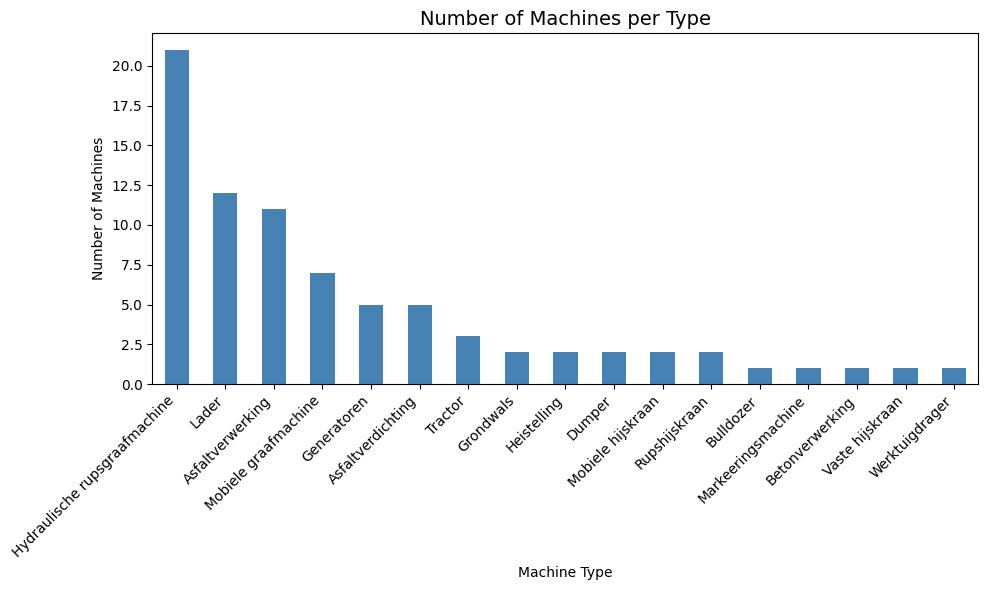

In [3]:
# Machines by MainGroupLabel (machine type)
machines_by_type = df.groupby('MainGroupLabel')['device_id'].nunique().sort_values(ascending=False)
print("Machines per type:")
print(machines_by_type)

fig, ax = plt.subplots(figsize=(10, 6))
machines_by_type.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Number of Machines per Type', fontsize=14)
ax.set_xlabel('Machine Type')
ax.set_ylabel('Number of Machines')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Records per machine state:
machine_staat
Uit           7076
Werkend       1562
Stationair     842
Name: count, dtype: int64


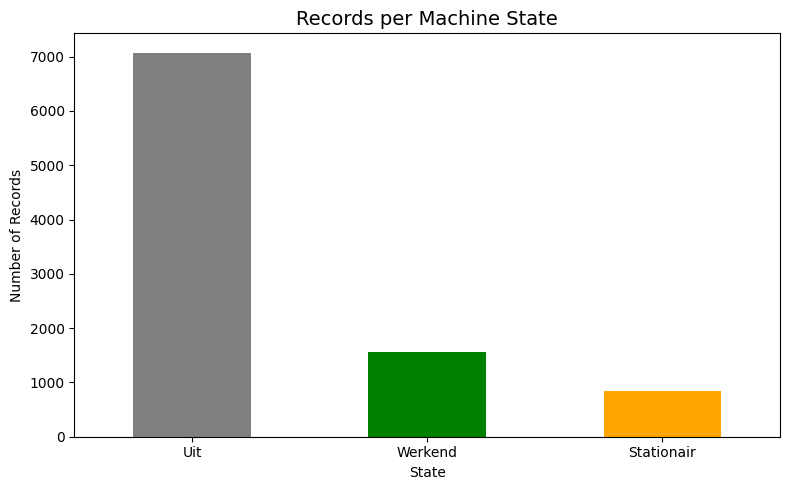

In [4]:
# Records per machine state
state_counts = df['machine_staat'].value_counts()
print("Records per machine state:")
print(state_counts)

fig, ax = plt.subplots(figsize=(8, 5))
colors = {'Uit': 'gray', 'Stationair': 'orange', 'Werkend': 'green'}
state_counts.plot(kind='bar', ax=ax, color=[colors.get(x, 'blue') for x in state_counts.index])
ax.set_title('Records per Machine State', fontsize=14)
ax.set_xlabel('State')
ax.set_ylabel('Number of Records')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## NOx Emissions: Measured vs eBay (AUB6)
Compare the actual NOx emissions (`NOx_mass_flow_kg`) with the expected eBay values (`NOx_AUB6_kg`)

In [5]:
# Filter for working machines only (where we have meaningful data)
df_working = df[df['machine_staat'] == 'Werkend'].copy()
df_working = df_working.dropna(subset=['NOx_mass_flow_kg', 'NOx_AUB6_kg', 'motorbelasting'])
print(f"Working records with complete data: {len(df_working):,}")

Working records with complete data: 1,562


In [6]:
# Aggregate per machine: total NOx measured vs total NOx eBay
machine_totals = df_working.groupby('device_id').agg({
    'NOx_mass_flow_kg': 'sum',
    'NOx_AUB6_kg': 'sum',
    'MainGroupLabel': 'first',
    'Power': 'first'
}).reset_index()

machine_totals['difference'] = machine_totals['NOx_mass_flow_kg'] - machine_totals['NOx_AUB6_kg']
machine_totals['diff_percent'] = (machine_totals['difference'] / machine_totals['NOx_AUB6_kg']) * 100

print("Per machine totals (NOx in kg):")
print(machine_totals.to_string())

Per machine totals (NOx in kg):
    device_id  NOx_mass_flow_kg  NOx_AUB6_kg                 MainGroupLabel  Power  difference  diff_percent
0       51349          0.353578     0.310209                    Heistelling  220.0    0.043369     13.980557
1       60245          0.019859     0.048522           Mobiele graafmachine  129.4   -0.028663    -59.071853
2       65689          0.158858     0.289220  Hydraulische rupsgraafmachine   29.0   -0.130362    -45.073692
3       65921          0.057990     0.114216  Hydraulische rupsgraafmachine  122.0   -0.056226    -49.227911
4       66968          0.028631     0.149193                    Generatoren  200.0   -0.120562    -80.809716
5       67501          0.102840     0.184435                        Tractor  215.0   -0.081595    -44.240613
6       67655          0.059904     0.048907              Mobiele hijskraan  129.0    0.010997     22.484668
7       67664          0.030007     0.021708              Mobiele hijskraan  103.0    0.008299  

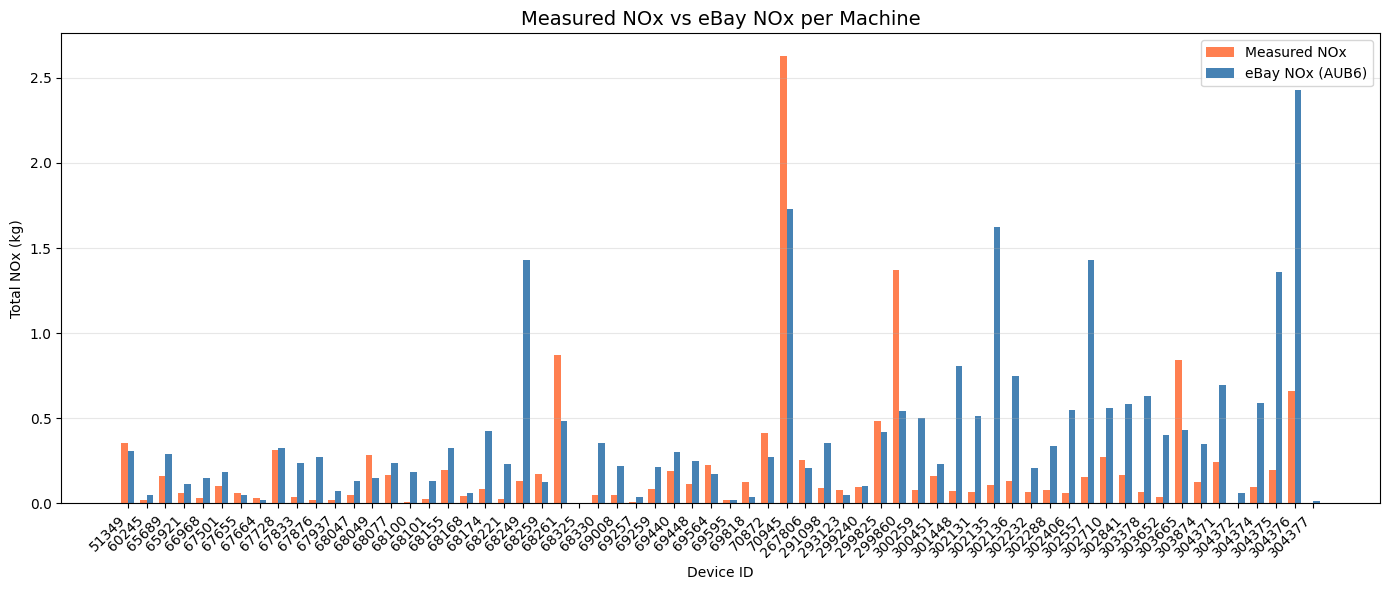

In [7]:
# Bar chart: Measured vs eBay NOx per machine
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(machine_totals))
width = 0.35

bars1 = ax.bar(x - width/2, machine_totals['NOx_mass_flow_kg'], width, label='Measured NOx', color='coral')
bars2 = ax.bar(x + width/2, machine_totals['NOx_AUB6_kg'], width, label='eBay NOx (AUB6)', color='steelblue')

ax.set_xlabel('Device ID')
ax.set_ylabel('Total NOx (kg)')
ax.set_title('Measured NOx vs eBay NOx per Machine', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(machine_totals['device_id'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

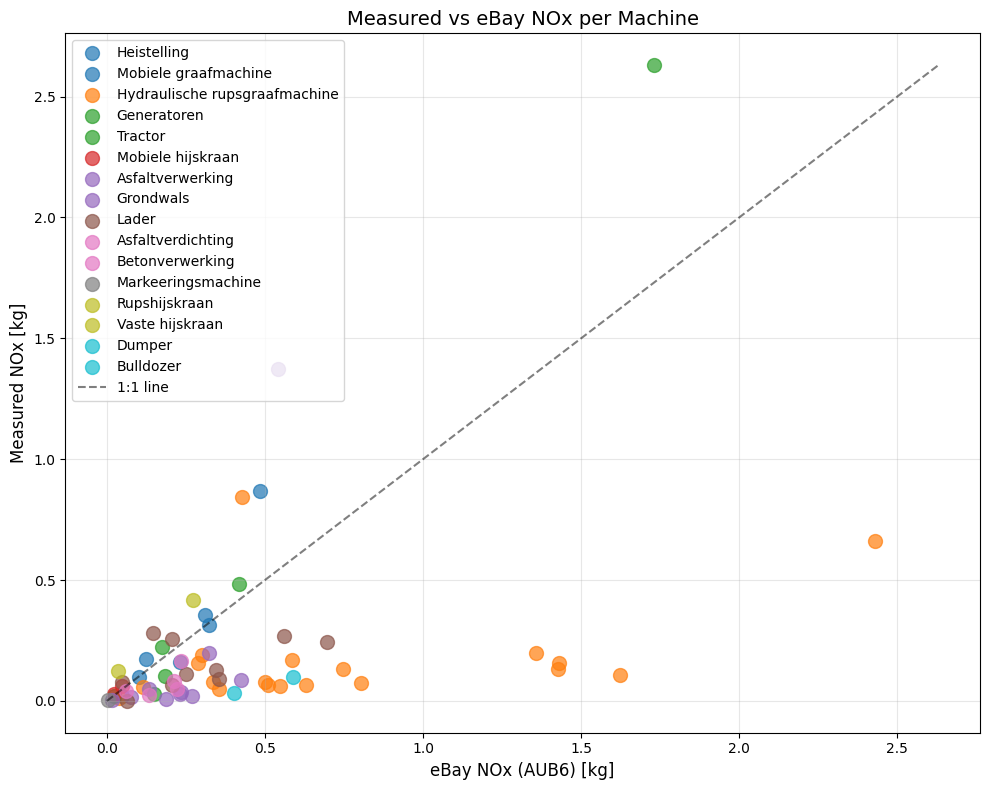

In [8]:
# Scatter plot: Measured vs eBay NOx (per machine)
fig, ax = plt.subplots(figsize=(10, 8))

# Color by machine type
types = machine_totals['MainGroupLabel'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(types)))
color_map = dict(zip(types, colors))

for mtype in types:
    mask = machine_totals['MainGroupLabel'] == mtype
    ax.scatter(machine_totals.loc[mask, 'NOx_AUB6_kg'], 
               machine_totals.loc[mask, 'NOx_mass_flow_kg'],
               c=[color_map[mtype]], label=mtype, s=100, alpha=0.7)

# Add 1:1 line
max_val = max(machine_totals['NOx_AUB6_kg'].max(), machine_totals['NOx_mass_flow_kg'].max())
ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

ax.set_xlabel('eBay NOx (AUB6) [kg]', fontsize=12)
ax.set_ylabel('Measured NOx [kg]', fontsize=12)
ax.set_title('Measured vs eBay NOx per Machine', fontsize=14)
ax.legend(loc='upper left')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# Summary by machine type
type_summary = df_working.groupby('MainGroupLabel').agg({
    'device_id': 'nunique',
    'NOx_mass_flow_kg': 'sum',
    'NOx_AUB6_kg': 'sum',
    'motorbelasting': 'mean'
}).rename(columns={'device_id': 'n_machines'})

type_summary['diff_percent'] = ((type_summary['NOx_mass_flow_kg'] - type_summary['NOx_AUB6_kg']) / type_summary['NOx_AUB6_kg']) * 100
type_summary = type_summary.sort_values('NOx_mass_flow_kg', ascending=False)

print("Summary by machine type:")
print(type_summary.round(2).to_string())

Summary by machine type:
                               n_machines  NOx_mass_flow_kg  NOx_AUB6_kg  motorbelasting  diff_percent
MainGroupLabel                                                                                        
Hydraulische rupsgraafmachine          19              3.29        14.45            0.47        -77.23
Generatoren                             4              2.90         2.08            1.33         39.80
Asfaltverwerking                        8              1.77         2.13            0.31        -16.85
Lader                                  10              1.53         2.88            0.30        -46.98
Heistelling                             2              1.22         0.80            0.18         53.86
Mobiele graafmachine                    5              0.76         0.83            0.27         -7.55
Tractor                                 2              0.59         0.60            0.46         -2.57
Vaste hijskraan                         1       

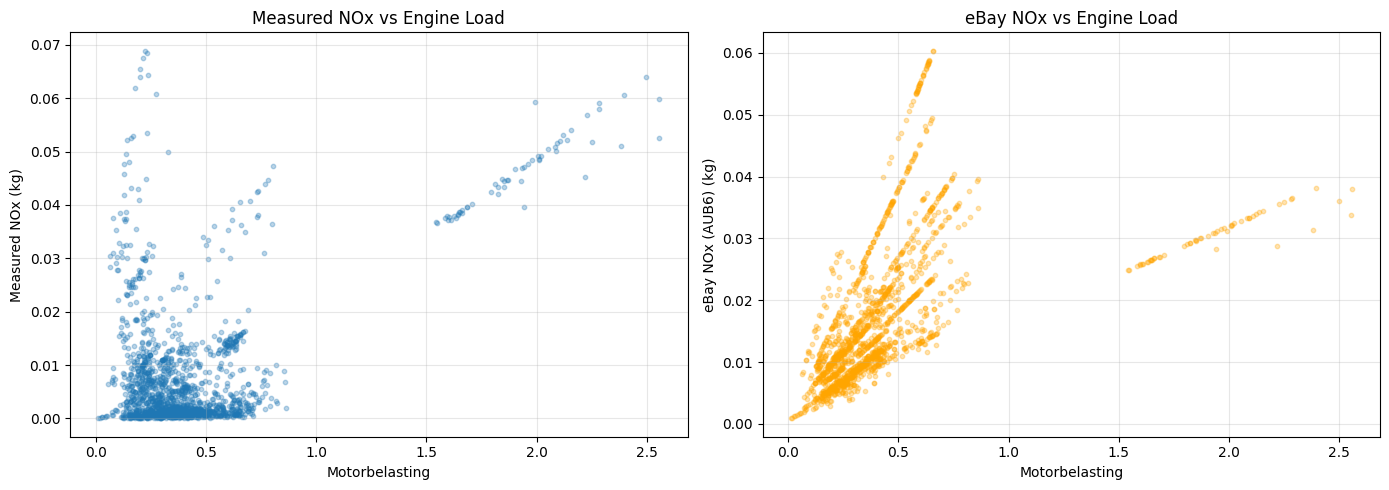

In [10]:
# NOx vs motorbelasting scatter (sample to avoid overplotting)
sample = df_working.sample(min(5000, len(df_working)), random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Measured NOx vs motorbelasting
ax1 = axes[0]
ax1.scatter(sample['motorbelasting'], sample['NOx_mass_flow_kg'], alpha=0.3, s=10)
ax1.set_xlabel('Motorbelasting')
ax1.set_ylabel('Measured NOx (kg)')
ax1.set_title('Measured NOx vs Engine Load')
ax1.grid(alpha=0.3)

# eBay NOx vs motorbelasting
ax2 = axes[1]
ax2.scatter(sample['motorbelasting'], sample['NOx_AUB6_kg'], alpha=0.3, s=10, color='orange')
ax2.set_xlabel('Motorbelasting')
ax2.set_ylabel('eBay NOx (AUB6) (kg)')
ax2.set_title('eBay NOx vs Engine Load')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

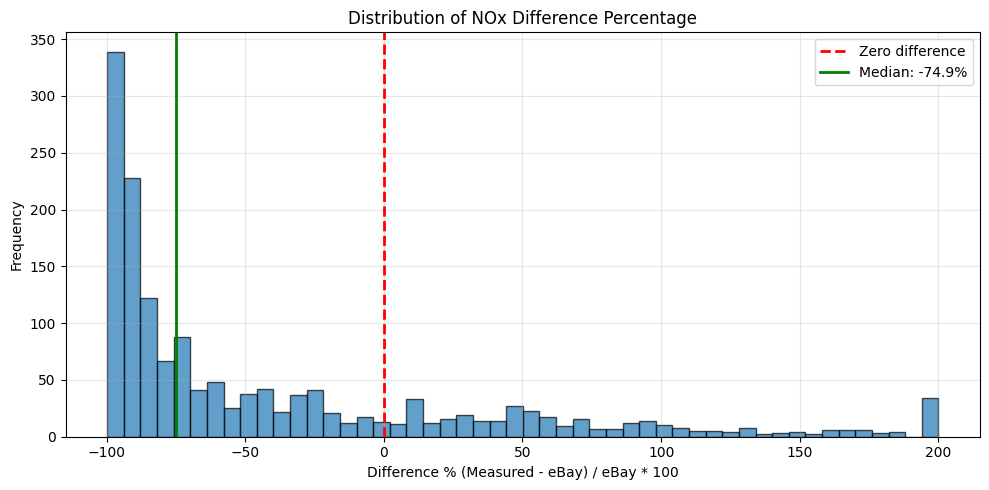


Difference statistics:
  Mean: -37.9%
  Median: -74.9%
  Std: 80.0%
  Records above 0% (higher than eBay): 364 (23.3%)
  Records below 0% (lower than eBay): 1,198 (76.7%)


In [11]:
# Distribution of difference percentage
fig, ax = plt.subplots(figsize=(10, 5))

# Filter out extreme values for visualization
diff_pct = df_working['verschil_percentage'].dropna()
diff_pct_clipped = diff_pct.clip(-200, 200)

ax.hist(diff_pct_clipped, bins=50, edgecolor='black', alpha=0.7)
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero difference')
ax.axvline(diff_pct.median(), color='green', linestyle='-', linewidth=2, label=f'Median: {diff_pct.median():.1f}%')

ax.set_xlabel('Difference % (Measured - eBay) / eBay * 100')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of NOx Difference Percentage')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDifference statistics:")
print(f"  Mean: {diff_pct.mean():.1f}%")
print(f"  Median: {diff_pct.median():.1f}%")
print(f"  Std: {diff_pct.std():.1f}%")
print(f"  Records above 0% (higher than eBay): {(diff_pct > 0).sum():,} ({(diff_pct > 0).mean()*100:.1f}%)")
print(f"  Records below 0% (lower than eBay): {(diff_pct < 0).sum():,} ({(diff_pct < 0).mean()*100:.1f}%)")

/var/folders/3p/c76jl7rs6md1p4bx48cs8wlh0000gn/T/ipykernel_4337/3447711696.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_type, labels=types_ordered, patch_artist=True)


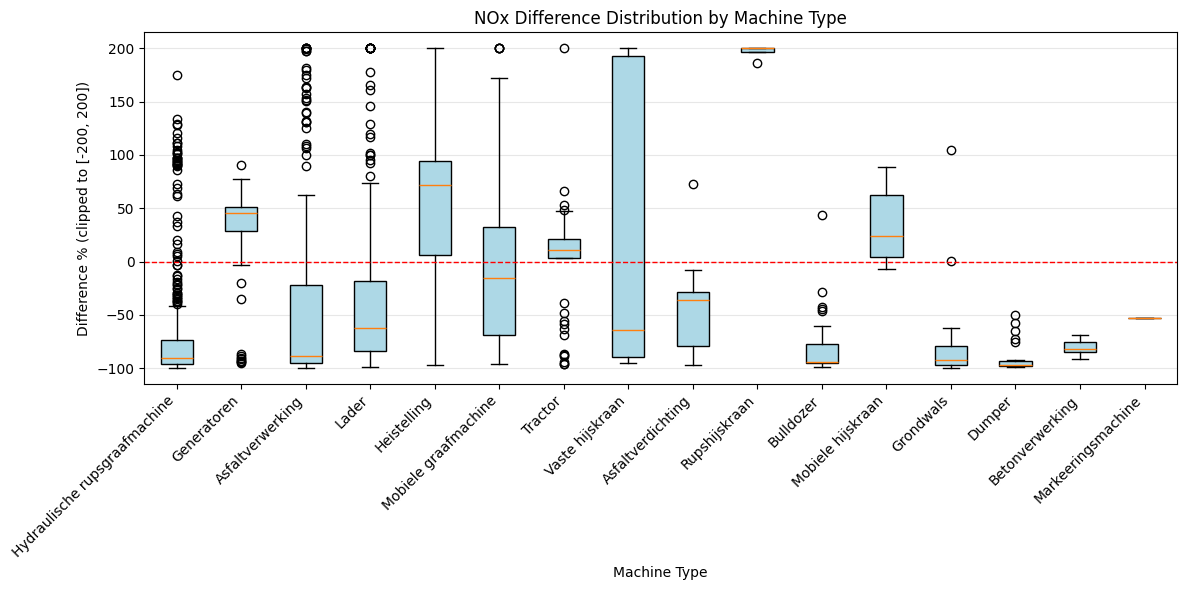

In [12]:
# Boxplot of difference percentage by machine type
fig, ax = plt.subplots(figsize=(12, 6))

types_ordered = type_summary.index.tolist()
data_by_type = [df_working[df_working['MainGroupLabel'] == t]['verschil_percentage'].dropna().clip(-200, 200) for t in types_ordered]

bp = ax.boxplot(data_by_type, labels=types_ordered, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')

ax.axhline(0, color='red', linestyle='--', linewidth=1)
ax.set_xlabel('Machine Type')
ax.set_ylabel('Difference % (clipped to [-200, 200])')
ax.set_title('NOx Difference Distribution by Machine Type')
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()